In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

style.use("seaborn")

In [2]:
data = pd.read_csv(r"C:\Users\a\OneDrive\Desktop\Project\DATA\data\weight-height.csv")
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
male = data[data["Gender"] == "Male"][:200]

male["Height"] = male["Height"].apply(lambda x: x*2.54)
male["Weight"] = male["Weight"].apply(lambda x: x/2.205)

In [4]:
# Convert from the DataFrame to List

height_list = male["Height"].tolist()
weight_list = male["Weight"].tolist()

In [5]:
x = np.array(height_list).reshape(-1,1)
y = np.array(weight_list).reshape(-1,1)

Text(0.5, 1.0, 'BMI')

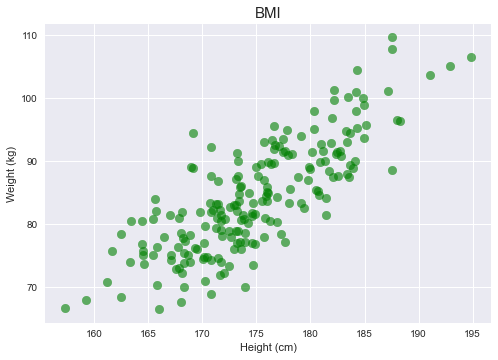

In [6]:
plt.scatter(x,y, color = "green", alpha = 0.6, s = 75)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("BMI", fontsize = 15)

In [7]:
model = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.2)
model.fit(x_train, y_train)
prediction = model.predict(x_test)


Text(0.5, 1.0, 'BMI Linear Regression')

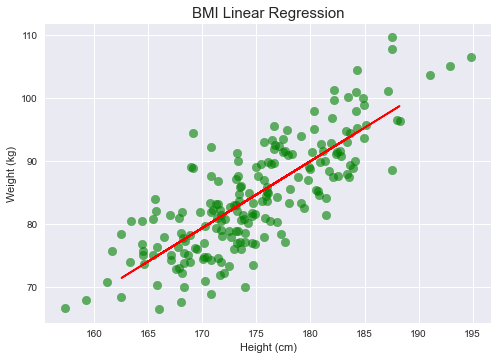

In [8]:
plt.scatter(x,y, color = "green", alpha = 0.6, s = 75)
plt.plot(x_test, prediction, color = "red")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("BMI Linear Regression", fontsize = 15)

In [12]:
len(x_test), len(y_test), len(x_train), len(y_train)

(40, 40, 160, 160)

In [13]:
mean_squared_error(x_test, prediction)

8150.257708771763

In [14]:
model.score(x_test,y_test)

0.5289083249915632